# Computing persistence barcodes in practice
## Introduction
In this tutorial, we will explore how to use the [Gudhi](https://gudhi.inria.fr/) library to compute persistence barcodes from point cloud data. Gudhi is a powerful Python library for Topological Data Analysis (TDA), providing efficient implementations of various simplicial complexes and persistent homology algorithms. We will demonstrate how to construct Vietoris-Rips and Alpha complexes from a simple point cloud, and how to extract and interpret their persistence barcodes, which capture the topological features of the data across multiple scales.

Let us look up online how Gudhi stores simplicial filtrations: the [SimplexTree structure](https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-simplex-Trees.ipynb).

## An example of point cloud

Now, let us compute persistence barcodes in an example, and plot them as persistence diagrams.

#### Point cloud 
Let us consider a point cloud with five points in the Euclidean plane:

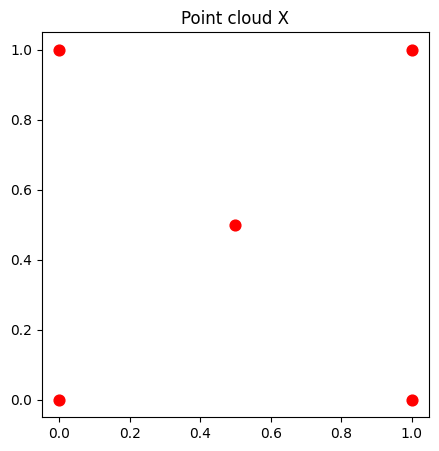

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1], [1/2,1/2]])

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c='red', s=60)
plt.title("Point cloud X")
plt.show()

#### Simplicial filtrations
Let us compute its Vietoris-Rips filtration:

In [4]:
import gudhi as gd

# Vietoris-Rips Complex Example
# Construct a Vietoris-Rips complex from the point cloud X
rips_complex = gd.RipsComplex(points=X, max_edge_length=2.0)
rips_simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

print("Vietoris-Rips Complex:")
for simplex in rips_simplex_tree.get_simplices():
    print(simplex)

Vietoris-Rips Complex:
([0, 1, 2], 1.4142135623730951)
([0, 1, 3], 1.4142135623730951)
([0, 1, 4], 1.0)
([0, 1], 1.0)
([0, 2, 3], 1.4142135623730951)
([0, 2, 4], 1.0)
([0, 2], 1.0)
([0, 3, 4], 1.4142135623730951)
([0, 3], 1.4142135623730951)
([0, 4], 0.7071067811865476)
([0], 0.0)
([1, 2, 3], 1.4142135623730951)
([1, 2, 4], 1.4142135623730951)
([1, 2], 1.4142135623730951)
([1, 3, 4], 1.0)
([1, 3], 1.0)
([1, 4], 0.7071067811865476)
([1], 0.0)
([2, 3, 4], 1.0)
([2, 3], 1.0)
([2, 4], 0.7071067811865476)
([2], 0.0)
([3, 4], 0.7071067811865476)
([3], 0.0)
([4], 0.0)


Some stats:

In [5]:
num_simplices_rips = rips_simplex_tree.num_simplices()
max_dim_rips = rips_simplex_tree.dimension()
print(f"Vietoris-Rips filtration: {num_simplices_rips} simplices\nMaximal dimension: {max_dim_rips}")

Vietoris-Rips filtration: 25 simplices
Maximal dimension: 2


A smaller alternative:

In [6]:
smaller_rips_complex = gd.RipsComplex(points=X, max_edge_length=2.0)
smaller_rips_simplex_tree = smaller_rips_complex.create_simplex_tree(max_dimension=1)
smaller_rips_simplex_tree.collapse_edges()
smaller_rips_simplex_tree.expansion(2)

print("Smaller Vietoris-Rips Complex:")
for simplex in smaller_rips_simplex_tree.get_simplices():
    print(simplex)

num_simplices_rips = smaller_rips_simplex_tree.num_simplices()
max_dim_rips = smaller_rips_simplex_tree.dimension()
print(f"\nSmaller Vietoris-Rips type filtration: {num_simplices_rips} simplices\nMaximal dimension: {max_dim_rips}")

Smaller Vietoris-Rips Complex:
([0, 4], 0.7071067811865476)
([0], 0.0)
([1, 4], 0.7071067811865476)
([1], 0.0)
([2, 4], 0.7071067811865476)
([2], 0.0)
([3, 4], 0.7071067811865476)
([3], 0.0)
([4], 0.0)

Smaller Vietoris-Rips type filtration: 9 simplices
Maximal dimension: 1


Let us do the same with the Alpha complex:

In [7]:
# Alpha Complex Example
# Construct an Alpha complex from the same point cloud X
alpha_complex = gd.AlphaComplex(points=X)
alpha_simplex_tree = alpha_complex.create_simplex_tree()

print("\nAlpha Complex:")
for simplex in alpha_simplex_tree.get_simplices():
    print(simplex)


Alpha Complex:
([0, 1, 4], 0.25)
([0, 1], 0.25)
([0, 2, 4], 0.25)
([0, 2], 0.25)
([0, 4], 0.125)
([0], 0.0)
([1, 3, 4], 0.25)
([1, 3], 0.25)
([1, 4], 0.125)
([1], 0.0)
([2, 3, 4], 0.25)
([2, 3], 0.25)
([2, 4], 0.125)
([2], 0.0)
([3, 4], 0.125)
([3], 0.0)
([4], 0.0)


#### Persistence barcodes

In [8]:
# Compute persistence for Vietoris-Rips filtration
rips_simplex_tree.compute_persistence()
print("Persistence intervals for Vietoris-Rips filtration (dimension 0):\n", rips_simplex_tree.persistence_intervals_in_dimension(0))

Persistence intervals for Vietoris-Rips filtration (dimension 0):
 [[0.         0.70710678]
 [0.         0.70710678]
 [0.         0.70710678]
 [0.         0.70710678]
 [0.                inf]]


In [9]:
# Compute persistence for Alpha filtration
alpha_simplex_tree.compute_persistence()
print("\nPersistence intervals for Alpha filtration (dimension 0):\n", alpha_simplex_tree.persistence_intervals_in_dimension(0))


Persistence intervals for Alpha filtration (dimension 0):
 [[0.    0.125]
 [0.    0.125]
 [0.    0.125]
 [0.    0.125]
 [0.      inf]]


#### Persistence diagrams

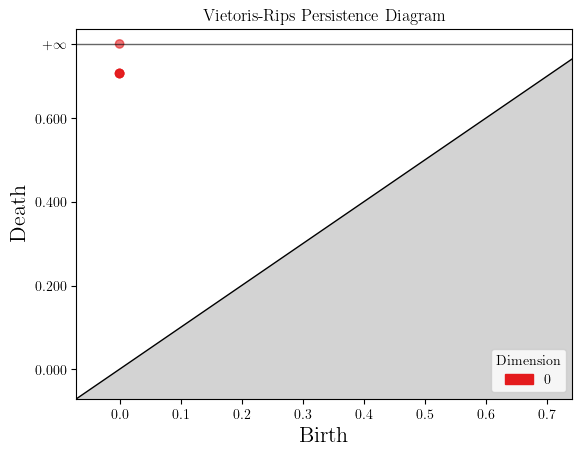

In [10]:
gd.plot_persistence_diagram(rips_simplex_tree.persistence())
plt.title("Vietoris-Rips Persistence Diagram")
plt.show()

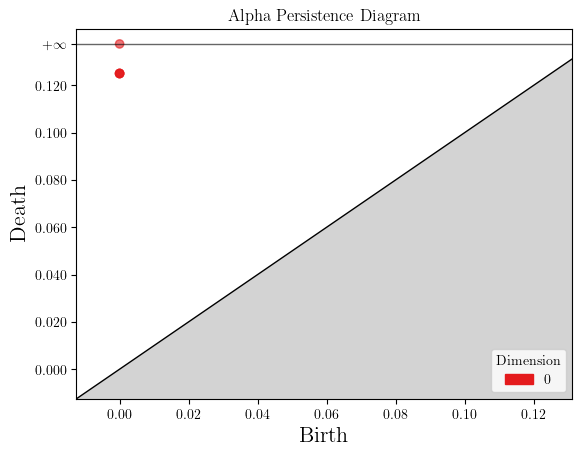

In [11]:
gd.plot_persistence_diagram(alpha_simplex_tree.persistence())
plt.title("Alpha Persistence Diagram")
plt.show()

# Challenges
### Challenge 1
1. Compute the Vietoris-Rips and Alpha filtrations of 1000 points uniformly sampled on the unit square of $\R^2$.
2. Compare the two filtrations.
3. Compute the persistence barcodes of this filtration and plot it as a persistence diagram.
4. Interpret what you see.
5. Do exactly the same in $\R^8$.

#### Solution 1

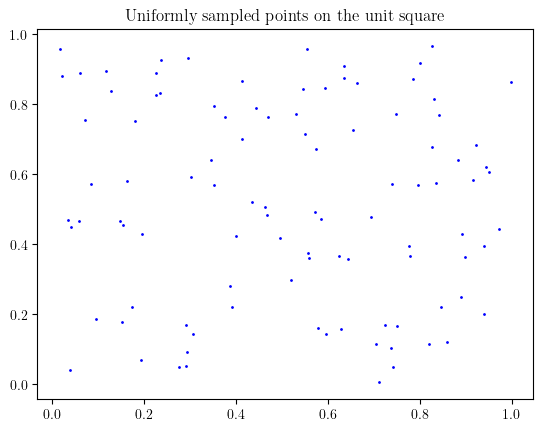

In [12]:
n_pts = 100
# Generate n points uniformly sampled on the unit square of R^2
points_unit_square = np.random.rand(n_pts, 2)

plt.figure()
plt.scatter(points_unit_square[:, 0], points_unit_square[:, 1], c='blue', s=1)
plt.title("Uniformly sampled points on the unit square")
plt.show()

In [13]:
# Compute Vietoris-Rips filtration
rips_complex_square = gd.RipsComplex(points=points_unit_square, max_edge_length=2.0)
rips_simplex_tree_square = rips_complex_square.create_simplex_tree(max_dimension=2)

In [14]:
# Compute smaller Vietoris-Rips filtration
smaller_rips_complex = gd.RipsComplex(points=points_unit_square, max_edge_length=2.0)
smaller_rips_simplex_tree_square = smaller_rips_complex.create_simplex_tree(max_dimension=1)
smaller_rips_simplex_tree_square.collapse_edges()
smaller_rips_simplex_tree_square.expansion(2)

In [15]:
# Compute Alpha filtration
alpha_complex_square = gd.AlphaComplex(points=points_unit_square)
alpha_simplex_tree_square = alpha_complex_square.create_simplex_tree()

In [16]:
# Compare the size (number of simplices) and maximal dimension of the two filtrations

# For Vietoris-Rips filtration
num_simplices_rips = rips_simplex_tree_square.num_simplices()
max_dim_rips = rips_simplex_tree_square.dimension()

num_simplices_smaller_rips = smaller_rips_simplex_tree_square.num_simplices()
max_dim_smaller_rips = smaller_rips_simplex_tree_square.dimension()

# For Alpha filtration
num_simplices_alpha = alpha_simplex_tree_square.num_simplices()
max_dim_alpha = alpha_simplex_tree_square.dimension()

print(f"Vietoris-Rips filtration: {num_simplices_rips} simplices, maximal dimension {max_dim_rips}")
print(f"Smaller Vietoris-Rips type filtration: {num_simplices_smaller_rips} simplices, maximal dimension: {max_dim_smaller_rips}")
print(f"Alpha filtration: {num_simplices_alpha} simplices, maximal dimension {max_dim_alpha}")

Vietoris-Rips filtration: 166750 simplices, maximal dimension 2
Smaller Vietoris-Rips type filtration: 480 simplices, maximal dimension: 2
Alpha filtration: 579 simplices, maximal dimension 2


Let us compute the persistence of these filtrations:

In [17]:
# Compute persistence for Vietoris-Rips on the unit square
rips_persistence = rips_simplex_tree_square.persistence()

In [18]:
# Compute persistence for smaller Vietoris-Rips on the unit square
smaller_rips_persistence = smaller_rips_simplex_tree_square.persistence()

In [19]:
# Compute persistence for Alpha on the unit square
alpha_persistence = alpha_simplex_tree_square.persistence()

We now plot their persistence diagrams:

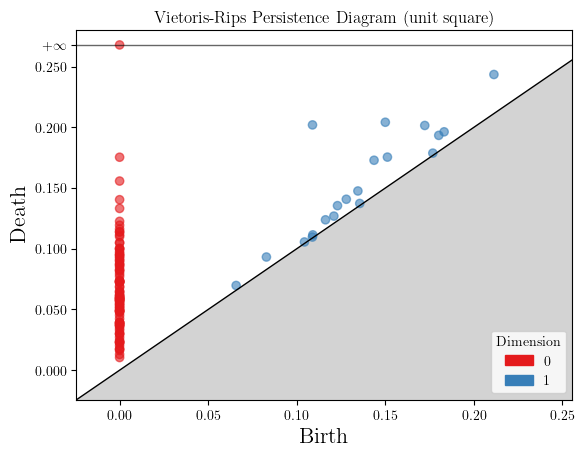

In [20]:
gd.plot_persistence_diagram(rips_persistence)
plt.title("Vietoris-Rips Persistence Diagram (unit square)")
plt.show()

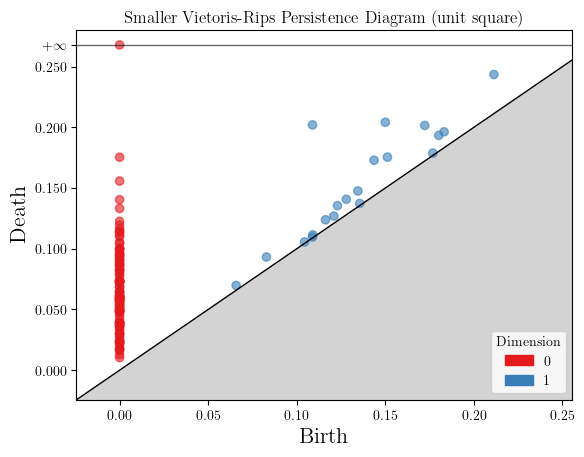

In [21]:
gd.plot_persistence_diagram(smaller_rips_persistence)
plt.title("Smaller Vietoris-Rips Persistence Diagram (unit square)")
plt.show()

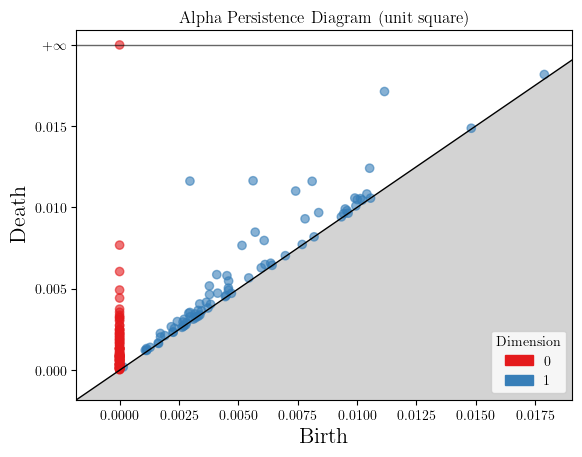

In [22]:
gd.plot_persistence_diagram(alpha_persistence)
plt.title("Alpha Persistence Diagram (unit square)")
plt.show()

Let us do the same in $\R^8$.

In [23]:
n_pts = 100
d = 8

# Generate n points uniformly sampled on the unit square of R^8
points_unit_square = np.random.rand(n_pts, d)

/!\ /!\ /!\ You can try do it with the Vietoris-Rips complex if you like, but it will make your computer crash by overflowing your RAM. /!\ /!\ /!\

Smaller Rips:

Smaller Vietoris-Rips type filtration: 31831493 simplices, maximal dimension: 8


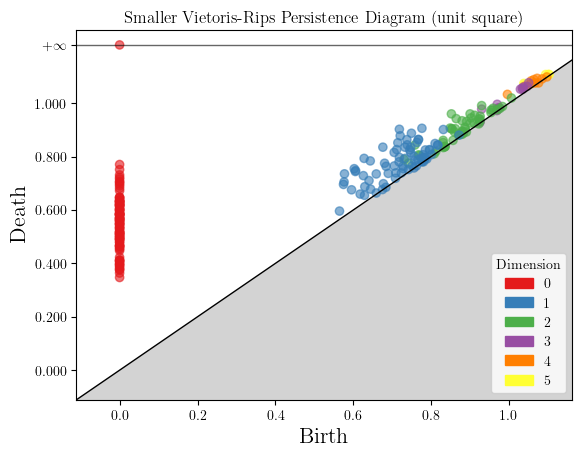

In [24]:
# Compute smaller Vietoris-Rips filtration
smaller_rips_complex = gd.RipsComplex(points=points_unit_square, max_edge_length=2.0)
smaller_rips_simplex_tree_square = smaller_rips_complex.create_simplex_tree(max_dimension=1)
smaller_rips_simplex_tree_square.collapse_edges()
smaller_rips_simplex_tree_square.expansion(d)

# Details on the filtration
num_simplices_smaller_rips = smaller_rips_simplex_tree_square.num_simplices()
max_dim_smaller_rips = smaller_rips_simplex_tree_square.dimension()
print(f"Smaller Vietoris-Rips type filtration: {num_simplices_smaller_rips} simplices, maximal dimension: {max_dim_smaller_rips}")

# Compute persistence for smaller Vietoris-Rips on the unit square
smaller_rips_persistence = smaller_rips_simplex_tree_square.persistence()

# Plot
gd.plot_persistence_diagram(smaller_rips_persistence)
plt.title("Smaller Vietoris-Rips Persistence Diagram (unit square)")
plt.show()

Alpha:

Alpha filtration: 6693559 simplices, maximal dimension 8


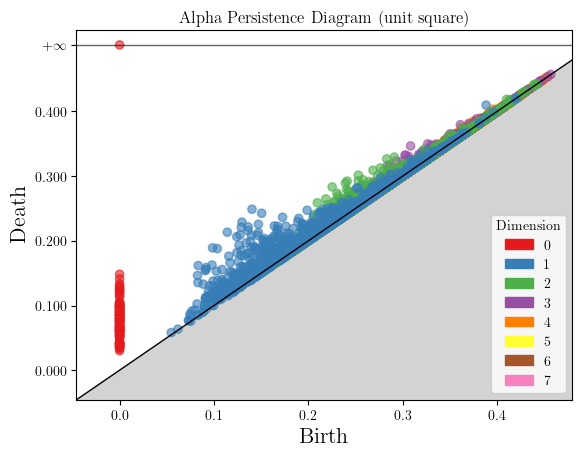

In [25]:
# Compute Alpha filtration
alpha_complex_square = gd.AlphaComplex(points=points_unit_square)
alpha_simplex_tree_square = alpha_complex_square.create_simplex_tree()

# For Alpha filtration
num_simplices_alpha = alpha_simplex_tree_square.num_simplices()
max_dim_alpha = alpha_simplex_tree_square.dimension()
print(f"Alpha filtration: {num_simplices_alpha} simplices, maximal dimension {max_dim_alpha}")

# Compute persistence for Alpha on the unit square
alpha_persistence = alpha_simplex_tree_square.persistence()

# Plot persistence diagram for Alpha filtration
gd.plot_persistence_diagram(alpha_persistence)
plt.title("Alpha Persistence Diagram (unit square)")
plt.show()

### Challenge 2
1. Compute the Vietoris-Rips filtration of points uniformly sampled on the unit circle of $\R^2$.
2. Compute the persistence diagram of this filtration.
3. Add radial noise to it, and interpret what you see.

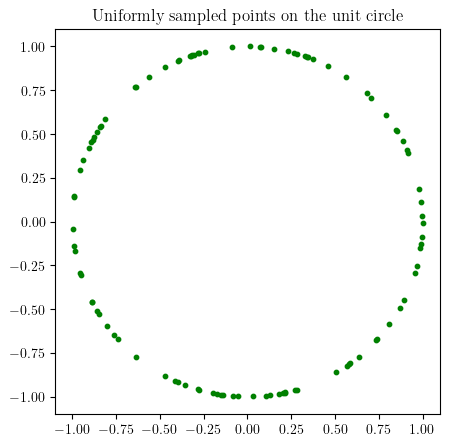

In [26]:
n_pts = 100
angles = 2 * np.pi * np.random.rand(n_pts)
X = np.stack([np.cos(angles), np.sin(angles)], axis=1)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c='green', s=10)
plt.gca().set_aspect('equal')
plt.title("Uniformly sampled points on the unit circle")
plt.show()

Smaller Vietoris-Rips type filtration: 122027 simplices, maximal dimension: 2
Persistence intervals for smaller Vietoris-Rips filtration (dimension 1):
 [[0.24953027 1.73457846]]


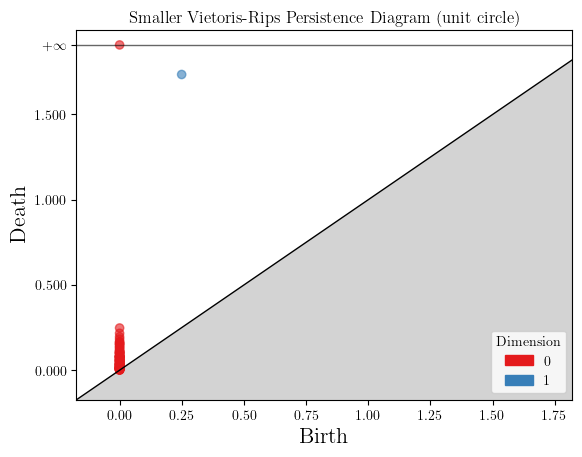

In [27]:
# Compute smaller Vietoris-Rips filtration
smaller_rips_complex = gd.RipsComplex(points=X, max_edge_length=2.0)
smaller_rips_simplex_tree = smaller_rips_complex.create_simplex_tree(max_dimension=1)
smaller_rips_simplex_tree.collapse_edges()
smaller_rips_simplex_tree.expansion(2)

# Details on the filtration
num_simplices_smaller_rips = smaller_rips_simplex_tree.num_simplices()
max_dim_smaller_rips = smaller_rips_simplex_tree.dimension()
print(f"Smaller Vietoris-Rips type filtration: {num_simplices_smaller_rips} simplices, maximal dimension: {max_dim_smaller_rips}")

# Compute persistence for smaller Vietoris-Rips on the unit square
smaller_rips_persistence = smaller_rips_simplex_tree.persistence()

# List bars in dimension 1
print("Persistence intervals for smaller Vietoris-Rips filtration (dimension 1):\n", smaller_rips_simplex_tree.persistence_intervals_in_dimension(1))

# Plot
gd.plot_persistence_diagram(smaller_rips_persistence)
plt.title("Smaller Vietoris-Rips Persistence Diagram (unit circle)")
plt.show()

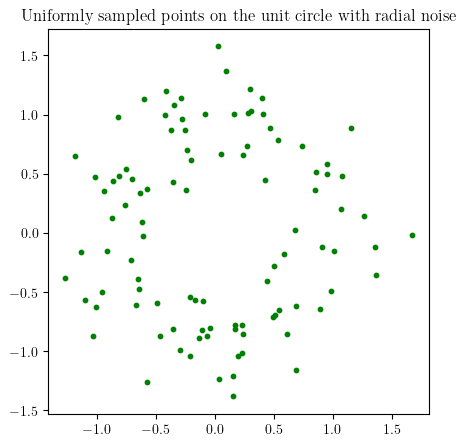

In [28]:
def add_radial_noise(X, epsilon):
    """
    Add radial noise of size epsilon to each point in X.
    X: numpy array of shape (n_points, 2)
    epsilon: float, noise level
    Returns: numpy array of shape (n_points, 2) with noise added
    """
    radii = np.linalg.norm(X, axis=1)
    noise = epsilon * np.random.randn(len(X))
    new_radii = radii + noise
    angles = np.arctan2(X[:, 1], X[:, 0])
    X_noisy = np.stack([new_radii * np.cos(angles), new_radii * np.sin(angles)], axis=1)
    return X_noisy

# Example usage:
epsilon = 0.25
X_noisy = add_radial_noise(X, epsilon)
plt.figure(figsize=(5, 5))
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c='green', s=10)
plt.gca().set_aspect('equal')
plt.title("Uniformly sampled points on the unit circle with radial noise")
plt.show()

Smaller Vietoris-Rips type filtration: 703 simplices, maximal dimension: 2


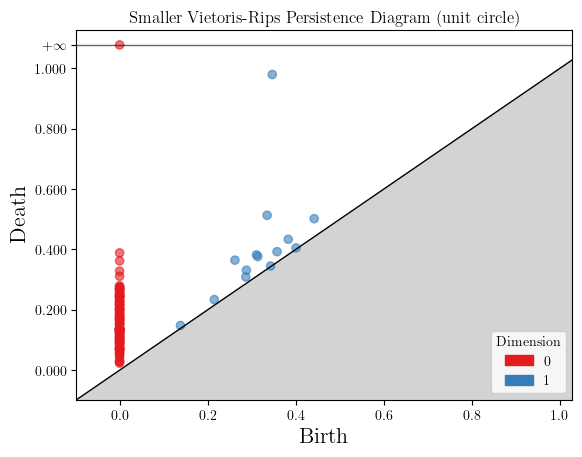

In [29]:
# Compute smaller Vietoris-Rips filtration
smaller_rips_complex = gd.RipsComplex(points=X_noisy, max_edge_length=3.0)
smaller_rips_simplex_tree = smaller_rips_complex.create_simplex_tree(max_dimension=1)
smaller_rips_simplex_tree.collapse_edges()
smaller_rips_simplex_tree.expansion(2)

# Details on the filtration
num_simplices_smaller_rips = smaller_rips_simplex_tree.num_simplices()
max_dim_smaller_rips = smaller_rips_simplex_tree.dimension()
print(f"Smaller Vietoris-Rips type filtration: {num_simplices_smaller_rips} simplices, maximal dimension: {max_dim_smaller_rips}")

# Compute persistence for smaller Vietoris-Rips on the unit square
smaller_rips_persistence = smaller_rips_simplex_tree.persistence()

# Plot
gd.plot_persistence_diagram(smaller_rips_persistence)
plt.title("Smaller Vietoris-Rips Persistence Diagram (unit circle)")
plt.show()

### Challenge 3
Compare the persistence barcodes associated with Alpha filtrations of the following two different sampling on the torus.

In [30]:
def gen_torus_unif(n_pts, noise=0, a=(1,1), c=(2,2)): 
	'''
	Draw n_pts uniformly at random on a torus of radii chosen at uniformly random in the intervals (a[0], a[1]) and (c[0], c[1]) respectively. A uniform noise of size noise is added to the points.
	'''
	a = a[0]+(a[1]-a[0])*np.random.rand() 
	c = c[0]+(c[1]-c[0])*np.random.rand()
	X = np.zeros((n_pts, 3))
	n_filled = 0
	while n_filled <n_pts:
		theta = np.random.uniform(0, 2*np.pi)
		eta = np.random.uniform(0, 1/np.pi)
		fx = (1+(a/c)*np.cos(theta))/(2*np.pi)
		if eta < fx:
			phi = np.random.uniform(0, 2*np.pi)
			X[n_filled] = [(c+a*np.cos(theta))*np.cos(phi),(c+a*np.cos(theta))*np.sin(phi), a*np.sin(theta)]
			n_filled+=1
	return X + noise*np.random.randn(*X.shape)

def gen_torus_non_unif(n_pts, noise=0, a=(1,1), c=(2,2)): #torus has random sizes drawn in a and c intervals
	'''
	Draw n_pts on a torus of radii chosen at uniformly random in the intervals (a[0], a[1]) and (c[0], c[1]) respectively. The points are drawn in toroidal coordinates with angles chosen uniformly at random. A uniform noise of size noise is added to the points.
	'''
	a = a[0]+(a[1]-a[0])*np.random.rand() 
	c = c[0]+(c[1]-c[0])*np.random.rand()
	theta = np.random.uniform(0, 2*np.pi, size = n_pts)
	phi = np.random.uniform(0,2*np.pi, size = n_pts)
	X = np.zeros((n_pts, 3))
	X[:,0] = (c+a*np.cos(theta))*np.cos(phi)
	X[:,1] = (c+a*np.cos(theta))*np.sin(phi)
	X[:,2] = a*np.sin(theta)
	return X + noise*np.random.randn(*X.shape)


In [31]:
# Generate the samples
n_pts = 10000
torus_unif = gen_torus_unif(n_pts)
torus_non_unif = gen_torus_non_unif(n_pts)

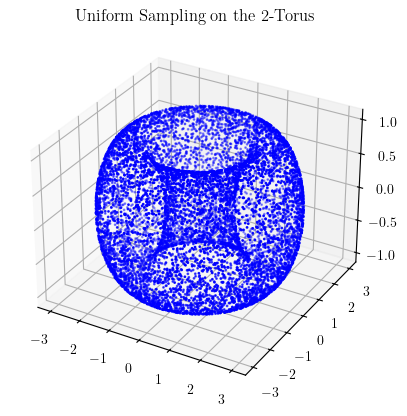

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(torus_unif[:, 0], torus_unif[:, 1], torus_unif[:, 2], s=1, c='blue')
ax.set_title("Uniform Sampling on the 2-Torus")
plt.show()

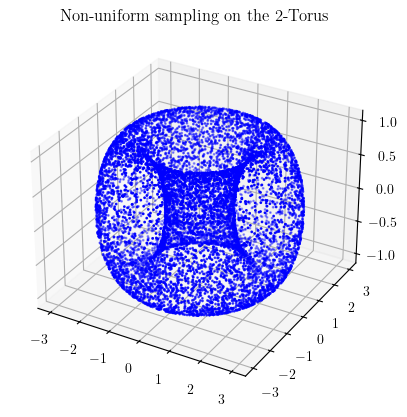

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(torus_non_unif[:, 0], torus_non_unif[:, 1], torus_non_unif[:, 2], s=1, c='blue')
ax.set_title("Non-uniform sampling on the 2-Torus")
plt.show()

Uniform:

Alpha filtration: 497579 simplices, maximal dimension 3


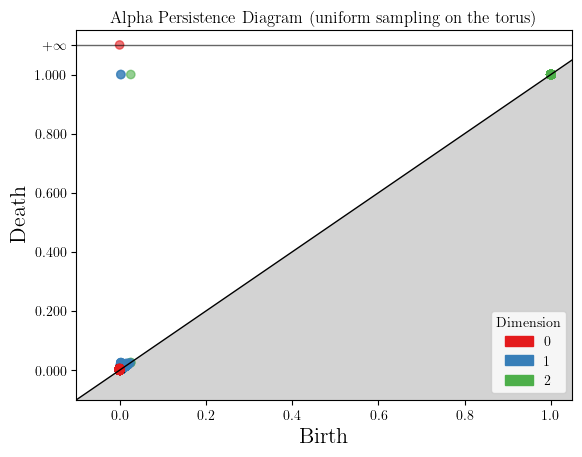

In [34]:
# Compute Alpha filtration
alpha_complex = gd.AlphaComplex(points=torus_unif)
alpha_simplex_tree = alpha_complex.create_simplex_tree()

# For Alpha filtration
num_simplices_alpha = alpha_simplex_tree.num_simplices()
max_dim_alpha = alpha_simplex_tree.dimension()
print(f"Alpha filtration: {num_simplices_alpha} simplices, maximal dimension {max_dim_alpha}")

# Compute persistence for Alpha on the unit square
alpha_persistence = alpha_simplex_tree.persistence()

# Plot persistence diagram for Alpha filtration
gd.plot_persistence_diagram(alpha_persistence)
plt.title("Alpha Persistence Diagram (uniform sampling on the torus)")
plt.show()

Alpha filtration: 560677 simplices, maximal dimension 3


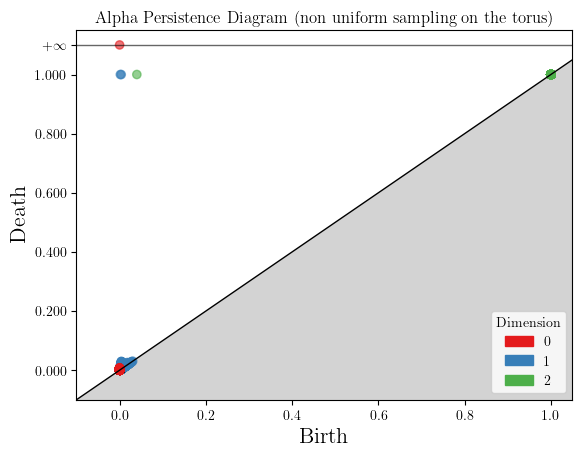

In [35]:
# Compute Alpha filtration
alpha_complex = gd.AlphaComplex(points=torus_non_unif)
alpha_simplex_tree = alpha_complex.create_simplex_tree()

# For Alpha filtration
num_simplices_alpha = alpha_simplex_tree.num_simplices()
max_dim_alpha = alpha_simplex_tree.dimension()
print(f"Alpha filtration: {num_simplices_alpha} simplices, maximal dimension {max_dim_alpha}")

# Compute persistence for Alpha on the unit square
alpha_persistence = alpha_simplex_tree.persistence()

# Plot persistence diagram for Alpha filtration
gd.plot_persistence_diagram(alpha_persistence)
plt.title("Alpha Persistence Diagram (non uniform sampling on the torus)")
plt.show()

# Further reading
I highly recommend the tutorials from the Gudhi library available online [here](https://github.com/GUDHI/TDA-tutorial/). For instance:
- If you want to learn more on Alpha complexes, see [here](https://github.com/VincentRouvreau/GUDHI_presentation-NIPS_2017/blob/master/Alpha_complex.ipynb).
- And to plot Alpha complexes on examples, it's [here](https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-alpha-complex-visualization.ipynb).
- A whole tutorial on persistence diagrams [here](https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-persistence-diagrams.ipynb).
